In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import decision_infovalue
import importlib
importlib.reload(decision_infovalue)

<module 'decision_infovalue' from '/Users/guoziyang/Documents/Documents - GuoZiYang的MacBook Pro/info-value-toolkit/decision_infovalue/__init__.py'>

# Data Preparation

In [3]:
data, metadata = decision_infovalue.get_dataset("deepfake")
data.head()

,video,fake,human_guess,human_ai_guess,ai_guess,computer_vision,grainy,floating distraction,dark,flickering face,dark skin individual,blurry,two people
0,v2attentioncheck.mp4,1,1.00,1.00,0.988000,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5201.mp4,0,0.10,0.10,0.013405,0.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6216.mp4,1,0.55,0.80,0.011719,0.99,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7356.mp4,0,0.16,0.16,0.500000,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6597.mp4,0,0.45,0.45,0.012291,0.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Marginal contribution of each video feature to the unexploited information value by each agent

## Unexploited information value in human decisions

In [62]:
info_model = decision_infovalue.DecisionInfoModel(data, metadata["target_name"], 
                                     signals=[f for f in metadata["feature_names"] if f not in ["video", "fake", "computer_vision", "ai_guess", "human_ai_guess"]], 
                                     scoring_rule="brier",
                                     fit_test_ratio=0.8,
                                     overfit_tolerance=0.1)

In [63]:
info_model.all_breaks

{'human_guess': None,
 'grainy': None,
 'floating distraction': None,
 'dark': None,
 'flickering face': None,
 'dark skin individual': None,
 'blurry': None,
 'two people': None}

In [64]:
video_features = [f for f in metadata["feature_names"] if f not in ["video", "fake", "computer_vision", "human_guess", "human_ai_guess", "ai_guess"]]
marginal_complement_info_value = np.zeros(len(video_features))
agent = "human_guess"
for i, signal in enumerate(video_features) :
    print("Computing marginal complement info value for", signal, "on", agent, "...", end="")
    marginal_complement_info_value[i] = info_model.marginal_complement_info_value(signal, agent)
    print("Done!")
marginal_complement_info_value


Computing marginal complement info value for grainy on human_guess ...Done!
Computing marginal complement info value for floating distraction on human_guess ...Done!
Computing marginal complement info value for dark on human_guess ...Done!
Computing marginal complement info value for flickering face on human_guess ...Done!
Computing marginal complement info value for dark skin individual on human_guess ...Done!
Computing marginal complement info value for blurry on human_guess ...Done!
Computing marginal complement info value for two people on human_guess ...Done!


array([0.00428714, 0.00489622, 0.00158615, 0.01357771, 0.00419743,
       0.00627918, 0.00681668])

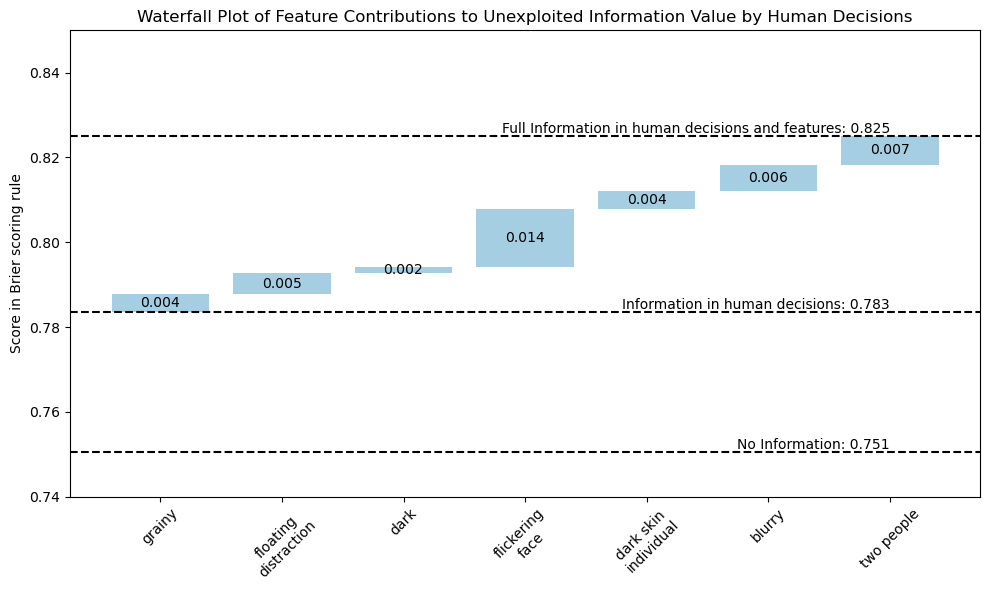

In [66]:
import matplotlib.pyplot as plt

# Set up the data for the waterfall plot
features = ['grainy', 'floating\ndistraction', 'dark', 'flickering\nface', 
            'dark skin\nindividual', 'blurry', 'two people']
values = marginal_complement_info_value[:] # Using human_guess values

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize variables for waterfall plot
bottom = info_model.complement_info_value("human_guess", []) + info_model.no_info_value

ax.axhline(y=bottom, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, bottom, f'Information in human decisions: {bottom:.3f}', 
        ha='right', va='bottom')


ax.axhline(y=info_model.no_info_value, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, info_model.no_info_value, f'No Information: {info_model.no_info_value:.3f}', 
        ha='right', va='bottom')

for i, value in enumerate(values):
    # Plot the bar
    if value > 0:
        ax.bar(i, value, bottom=bottom, color='#a6cee3')
    else:
        ax.bar(i, value, bottom=bottom, color='#a6cee3')
    
    # Add value label on top of each bar
    ax.text(i, bottom + value/2, f'{value:.3f}', 
            ha='center', va='center')
    
    # Update bottom for next bar
    bottom += value

# Customize plot
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features, rotation=45)
ax.set_ylabel('Score in Brier scoring rule')
ax.set_ylim(0.74, 0.85)
ax.set_title('Waterfall Plot of Feature Contributions to Unexploited Information Value by Human Decisions')

# Add total line
ax.axhline(y=bottom, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, bottom, f'Full Information in human decisions and features: {bottom:.3f}', 
        ha='right', va='bottom')


plt.tight_layout()
plt.show()


## Unexploited information value in AI decisions

In [55]:
ai_info_model = decision_infovalue.DecisionInfoModel(data, metadata["target_name"], 
                                     signals=[f for f in metadata["feature_names"] if f not in ["video", "fake", "computer_vision", "human_guess", "human_ai_guess"]], 
                                     scoring_rule="brier",
                                     fit_test_ratio=0.8,
                                     overfit_tolerance=0.1)

In [56]:
ai_info_model.all_breaks

{'ai_guess': None,
 'grainy': None,
 'floating distraction': None,
 'dark': None,
 'flickering face': None,
 'dark skin individual': None,
 'blurry': None,
 'two people': None}

In [67]:
video_features = [f for f in metadata["feature_names"] if f not in ["video", "fake", "computer_vision", "human_guess", "human_ai_guess", "ai_guess"]]
ai_marginal_complement_info_value = np.zeros(len(video_features))
agent = "ai_guess"
for i, signal in enumerate(video_features) :
    print("Computing marginal complement info value for", signal, "on", agent, "...", end="")
    ai_marginal_complement_info_value[i] = ai_info_model.marginal_complement_info_value(signal, agent)
    print("Done!")
ai_marginal_complement_info_value


Computing marginal complement info value for grainy on ai_guess ...Done!
Computing marginal complement info value for floating distraction on ai_guess ...Done!
Computing marginal complement info value for dark on ai_guess ...Done!
Computing marginal complement info value for flickering face on ai_guess ...Done!
Computing marginal complement info value for dark skin individual on ai_guess ...Done!
Computing marginal complement info value for blurry on ai_guess ...Done!
Computing marginal complement info value for two people on ai_guess ...Done!


array([0.        , 0.00287569, 0.0013634 , 0.        , 0.00341846,
       0.        , 0.00745533])

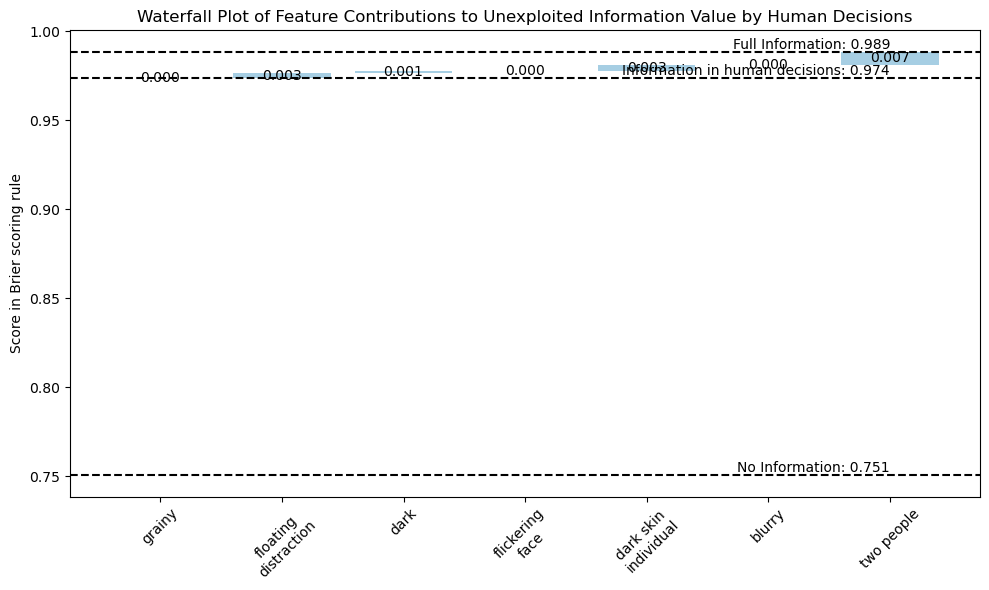

In [68]:
import matplotlib.pyplot as plt

# Set up the data for the waterfall plot
features = ['grainy', 'floating\ndistraction', 'dark', 'flickering\nface', 
            'dark skin\nindividual', 'blurry', 'two people']
values = ai_marginal_complement_info_value[:] # Using human_guess values

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize variables for waterfall plot
bottom = ai_info_model.complement_info_value("ai_guess", []) + ai_info_model.no_info_value

ax.axhline(y=bottom, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, bottom, f'Information in human decisions: {bottom:.3f}', 
        ha='right', va='bottom')


ax.axhline(y=ai_info_model.no_info_value, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, ai_info_model.no_info_value, f'No Information: {ai_info_model.no_info_value:.3f}', 
        ha='right', va='bottom')

for i, value in enumerate(values):
    # Plot the bar
    if value > 0:
        ax.bar(i, value, bottom=bottom, color='#a6cee3')
    else:
        ax.bar(i, value, bottom=bottom, color='#a6cee3')
    
    # Add value label on top of each bar
    ax.text(i, bottom + value/2, f'{value:.3f}', 
            ha='center', va='center')
    
    # Update bottom for next bar
    bottom += value

# Customize plot
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features, rotation=45)
ax.set_ylabel('Score in Brier scoring rule')
# ax.set_ylim(0.74, 0.85)
ax.set_title('Waterfall Plot of Feature Contributions to Unexploited Information Value by Human Decisions')

# Add total line
ax.axhline(y=bottom, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, bottom, f'Full Information: {bottom:.3f}', 
        ha='right', va='bottom')


plt.tight_layout()
plt.show()

## Unexploited information value in human+AI decisions

In [70]:
humanai_info_model = decision_infovalue.DecisionInfoModel(data, metadata["target_name"], 
                                     signals=[f for f in metadata["feature_names"] if f not in ["video", "fake", "computer_vision", "human_guess", "ai_guess"]], 
                                     scoring_rule="brier",
                                     fit_test_ratio=0.8,
                                     overfit_tolerance=0.1)
humanai_info_model.all_breaks

{'human_ai_guess': None,
 'grainy': None,
 'floating distraction': None,
 'dark': None,
 'flickering face': None,
 'dark skin individual': None,
 'blurry': None,
 'two people': None}

In [71]:
video_features = [f for f in metadata["feature_names"] if f not in ["video", "fake", "computer_vision", "human_guess", "human_ai_guess", "ai_guess"]]
humanai_marginal_complement_info_value = np.zeros(len(video_features))
agent = "human_ai_guess"
for i, signal in enumerate(video_features) :
    print("Computing marginal complement info value for", signal, "on", agent, "...", end="")
    humanai_marginal_complement_info_value[i] = humanai_info_model.marginal_complement_info_value(signal, agent)
    print("Done!")
humanai_marginal_complement_info_value


Computing marginal complement info value for grainy on human_ai_guess ...Done!
Computing marginal complement info value for floating distraction on human_ai_guess ...Done!
Computing marginal complement info value for dark on human_ai_guess ...Done!
Computing marginal complement info value for flickering face on human_ai_guess ...Done!
Computing marginal complement info value for dark skin individual on human_ai_guess ...Done!
Computing marginal complement info value for blurry on human_ai_guess ...Done!
Computing marginal complement info value for two people on human_ai_guess ...Done!


array([0.00415787, 0.00411482, 0.00163606, 0.0103205 , 0.00467233,
       0.00709333, 0.00592536])

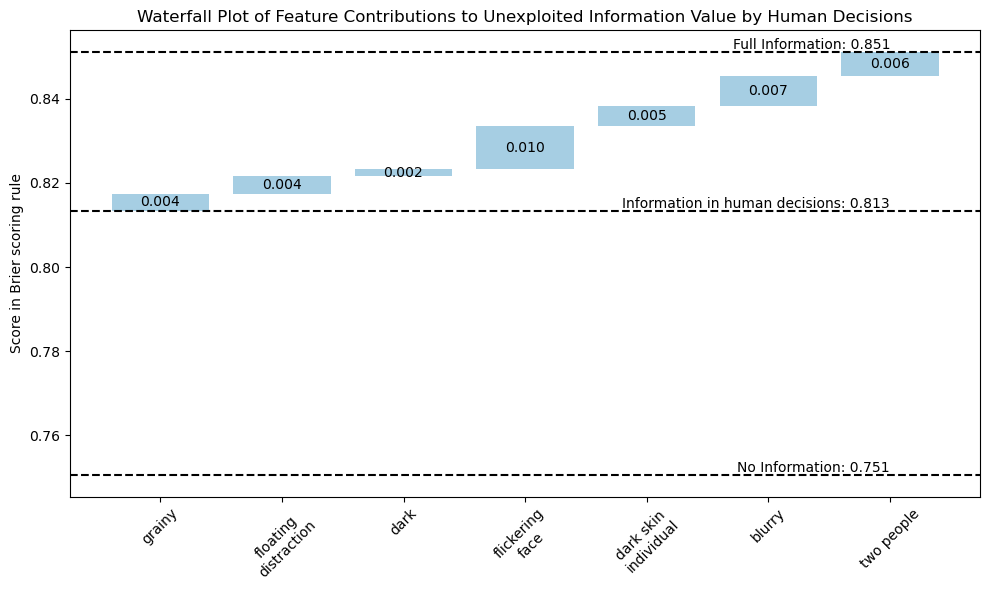

In [72]:
import matplotlib.pyplot as plt

# Set up the data for the waterfall plot
features = ['grainy', 'floating\ndistraction', 'dark', 'flickering\nface', 
            'dark skin\nindividual', 'blurry', 'two people']
values = humanai_marginal_complement_info_value[:] # Using human_guess values

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize variables for waterfall plot
bottom = humanai_info_model.complement_info_value("human_ai_guess", []) + humanai_info_model.no_info_value

ax.axhline(y=bottom, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, bottom, f'Information in human decisions: {bottom:.3f}', 
        ha='right', va='bottom')


ax.axhline(y=humanai_info_model.no_info_value, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, humanai_info_model.no_info_value, f'No Information: {humanai_info_model.no_info_value:.3f}', 
        ha='right', va='bottom')

for i, value in enumerate(values):
    # Plot the bar
    if value > 0:
        ax.bar(i, value, bottom=bottom, color='#a6cee3')
    else:
        ax.bar(i, value, bottom=bottom, color='#a6cee3')
    
    # Add value label on top of each bar
    ax.text(i, bottom + value/2, f'{value:.3f}', 
            ha='center', va='center')
    
    # Update bottom for next bar
    bottom += value

# Customize plot
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features, rotation=45)
ax.set_ylabel('Score in Brier scoring rule')
# ax.set_ylim(0.74, 0.85)
ax.set_title('Waterfall Plot of Feature Contributions to Unexploited Information Value by Human Decisions')

# Add total line
ax.axhline(y=bottom, color='black', linestyle='--', label='Total')
ax.text(len(features)-1, bottom, f'Full Information: {bottom:.3f}', 
        ha='right', va='bottom')


plt.tight_layout()
plt.show()